In [1]:
# Walmart Kundenkaufdaten-Analyse

# Dieses Notebook analysiert Kundenkaufdaten von Walmart, um Muster zu identifizieren und die Grundlage für eine prädiktive Modellierung zu schaffen.

In [2]:
# Notwendige Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# Daten laden
df = pd.read_csv('Walmart_customer_purchases.csv')

# Die ersten Zeilen anzeigen
df.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes


In [4]:
## 2.1 Zielfeld für die Vorhersage

# Für diese Analyse möchte ich die Produktkategorie (`Category`) vorhersagen, die ein Kunde basierend auf demografischen Faktoren wie Alter und Geschlecht kaufen wird.

# Meine Hypothese ist, dass bestimmte demografische Gruppen unterschiedliche Kaufpräferenzen haben. Zum Beispiel:
# - Männliche Kunden kaufen möglicherweise eher Elektronik
# - Weibliche Kunden haben möglicherweise eine höhere Präferenz für Schönheitsprodukte
# - Jüngere Kunden bevorzugen möglicherweise andere Kategorien als ältere Kunden

In [5]:
# Überprüfen der Verteilung der Zielvariablen (Kategorie)
category_counts = df['Category'].value_counts()
print("Produktkategorieverteilung:")
print(category_counts)

Produktkategorieverteilung:
Category
Electronics    12642
Home           12492
Beauty         12447
Clothing       12419
Name: count, dtype: int64


In [6]:
# Untersuchung der Beziehung zwischen Geschlecht und Kategorie
gender_category = pd.crosstab(df['Gender'], df['Category'])
print("\nKaufkategorie nach Geschlecht:")
print(gender_category)


Kaufkategorie nach Geschlecht:
Category  Beauty  Clothing  Electronics  Home
Gender                                       
Female      4190      4151         4072  4192
Male        4202      4051         4284  4107
Other       4055      4217         4286  4193


In [7]:
## 2.2 Statistische Informationen für jedes Feld

In [8]:
# Liste der relevanten numerischen Felder
numerical_fields = ['Age', 'Purchase_Amount', 'Rating']

# Median, Standardabweichung und Interquartilsabstand berechnen
stats = {}
for field in numerical_fields:
    field_data = df[field].dropna()
    
    # Statistiken berechnen
    median = np.median(field_data)
    std_dev = np.std(field_data)
    quartiles = np.percentile(field_data, [25, 75])
    iqr = quartiles[1] - quartiles[0]
    
    # Ergebnisse speichern
    stats[field] = {
        'Median': median,
        'Standardabweichung': std_dev,
        'IQR': iqr
    }

# Statistiken anzeigen
print("Statistische Informationen:")
for field, metrics in stats.items():
    print(f"\n{field}:")
    print(f"  Median: {metrics['Median']}")
    print(f"  Standardabweichung: {metrics['Standardabweichung']}")
    print(f"  Interquartilsabstand: {metrics['IQR']}")

Statistische Informationen:

Age:
  Median: 39.0
  Standardabweichung: 12.39801351635011
  Interquartilsabstand: 22.0

Purchase_Amount:
  Median: 255.04500000000002
  Standardabweichung: 141.57300007812538
  Interquartilsabstand: 245.8625

Rating:
  Median: 3.0
  Standardabweichung: 1.4179415564824949
  Interquartilsabstand: 2.0


In [9]:
# Zusätzliche Statistiken für kategoriale Variablen
categorical_fields = ['Gender', 'Category', 'Payment_Method', 'Discount_Applied', 'Repeat_Customer']

print("\nHäufigkeitsverteilung für kategoriale Variablen:")
for field in categorical_fields:
    print(f"\n{field} Verteilung:")
    value_counts = df[field].value_counts(normalize=True) * 100  # Prozentangaben
    print(value_counts)


Häufigkeitsverteilung für kategoriale Variablen:

Gender Verteilung:
Gender
Other     33.502
Male      33.288
Female    33.210
Name: proportion, dtype: float64

Category Verteilung:
Category
Electronics    25.284
Home           24.984
Beauty         24.894
Clothing       24.838
Name: proportion, dtype: float64

Payment_Method Verteilung:
Payment_Method
Debit Card          25.178
Credit Card         25.056
Cash on Delivery    24.992
UPI                 24.774
Name: proportion, dtype: float64

Discount_Applied Verteilung:
Discount_Applied
No     50.036
Yes    49.964
Name: proportion, dtype: float64

Repeat_Customer Verteilung:
Repeat_Customer
Yes    50.488
No     49.512
Name: proportion, dtype: float64


In [10]:
## 2.3 Datenvisualisierung

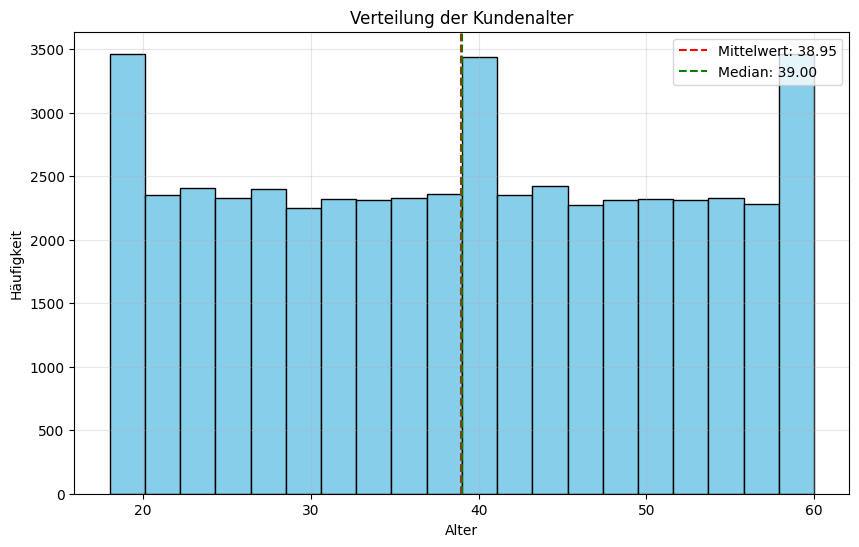

In [11]:
# Histogramm für die Altersverteilung erstellen
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Verteilung der Kundenalter')
plt.xlabel('Alter')
plt.ylabel('Häufigkeit')
plt.grid(True, alpha=0.3)

# Vertikale Linien für Mittelwert und Median hinzufügen
plt.axvline(x=df['Age'].mean(), color='red', linestyle='--', label=f'Mittelwert: {df["Age"].mean():.2f}')
plt.axvline(x=df['Age'].median(), color='green', linestyle='--', label=f'Median: {df["Age"].median():.2f}')
plt.legend()

plt.show()

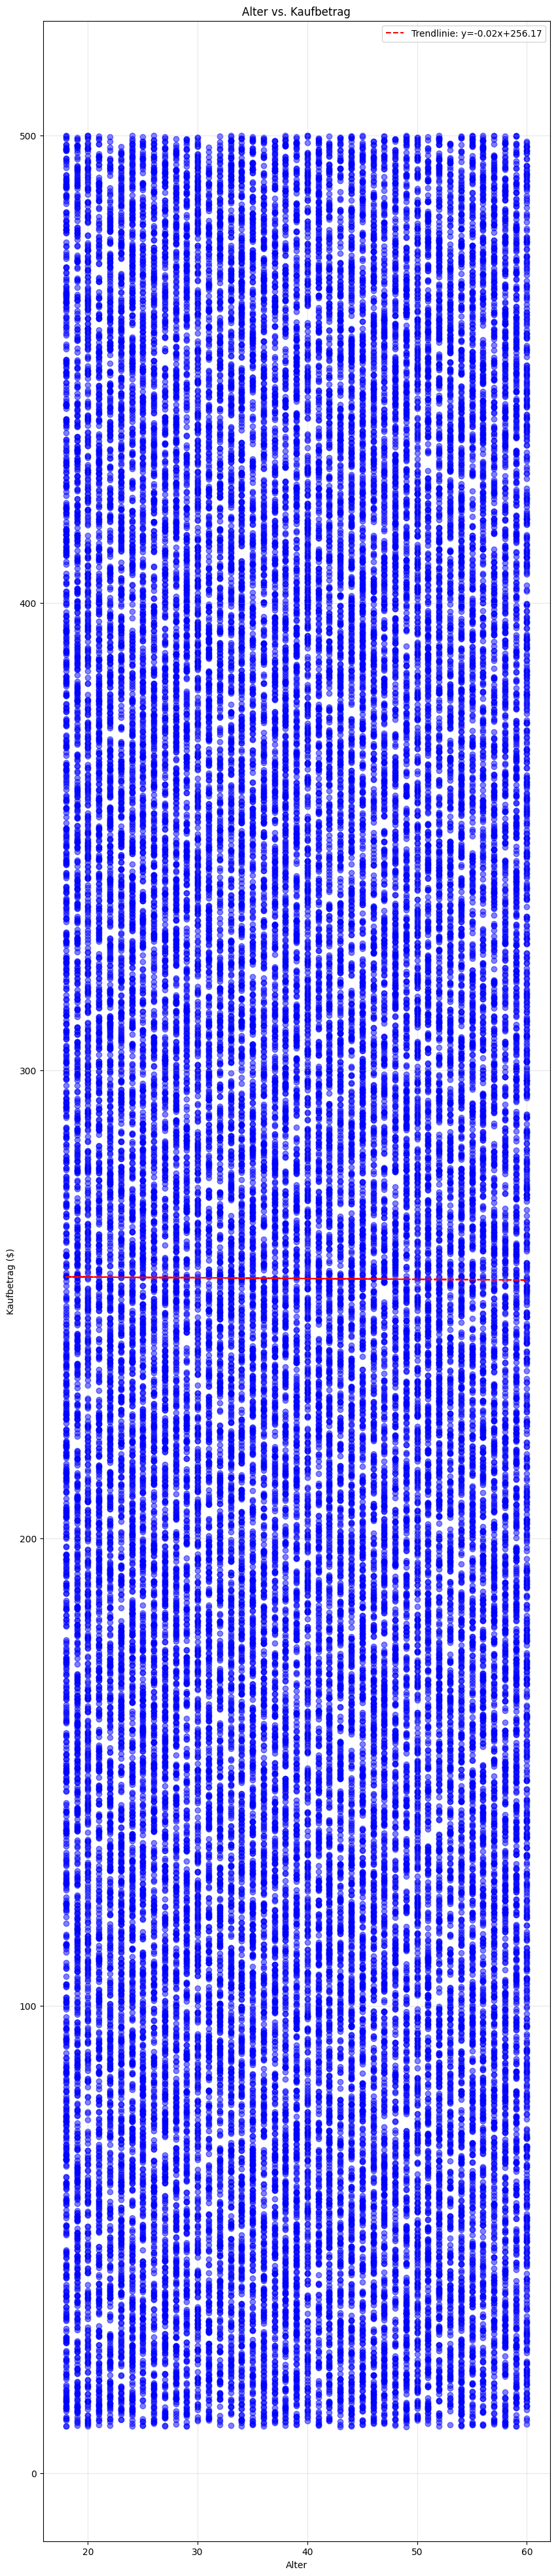

In [34]:
# Streudiagramm mit Regressionslinie für Alter vs. Kaufbetrag erstellen
plt.figure(figsize=(10, 50))

# Streupunkte plotten
plt.scatter(df['Age'], df['Purchase_Amount'], alpha=0.5, color='blue')

# Regressionslinie berechnen und plotten (mit numpy's polyfit)
z = np.polyfit(df['Age'], df['Purchase_Amount'], 1)
p = np.poly1d(z)
plt.plot(df['Age'], p(df['Age']), "r--", label=f'Trendlinie: y={z[0]:.2f}x+{z[1]:.2f}')

plt.title('Alter vs. Kaufbetrag')
plt.xlabel('Alter')
plt.ylabel('Kaufbetrag ($)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

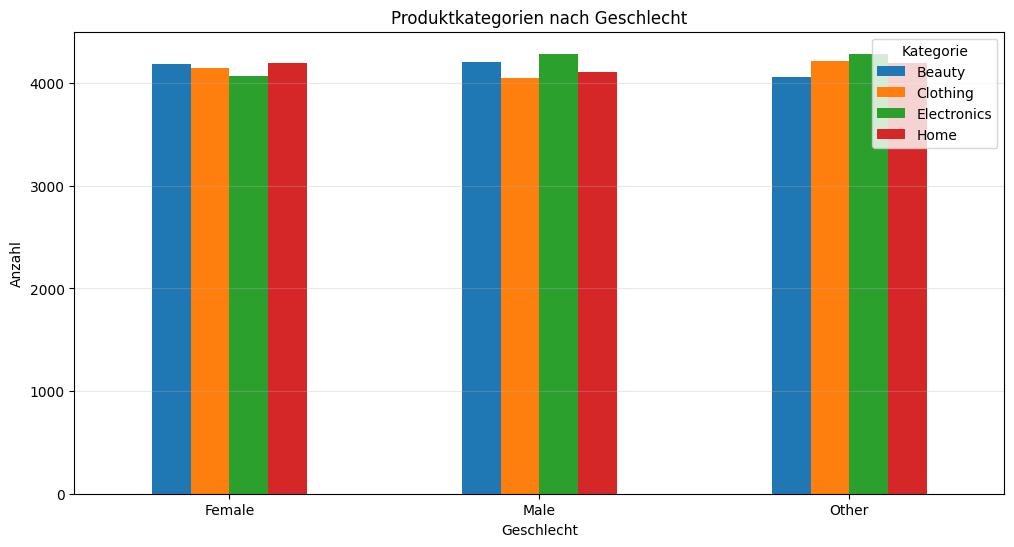

In [13]:
# Balkendiagramm für Kategorieverteilung nach Geschlecht erstellen
gender_category = pd.crosstab(df['Gender'], df['Category'])
gender_category.plot(kind='bar', figsize=(12, 6))
plt.title('Produktkategorien nach Geschlecht')
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl')
plt.xticks(rotation=0)
plt.legend(title='Kategorie')
plt.grid(axis='y', alpha=0.3)

plt.show()

In [14]:
## 2.4 Datenskalierung

In [15]:
# Zu skalierende Merkmale
features_to_scale = ['Age', 'Purchase_Amount']

# Eine Kopie des Dataframes erstellen, um das Original nicht zu verändern
df_scaled = df.copy()

# StandardScaler initialisieren
scaler = StandardScaler()

# Ausgewählte Merkmale anpassen und transformieren
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Die ersten Zeilen der originalen und skalierten Daten anzeigen
print("Originaldaten:")
print(df[features_to_scale].head())
print("\nSkalierte Daten:")
print(df_scaled[features_to_scale].head())

Originaldaten:
   Age  Purchase_Amount
0   49           253.26
1   36            73.19
2   52           125.62
3   47           450.32
4   43           369.28

Skalierte Daten:
        Age  Purchase_Amount
0  0.810999        -0.016050
1 -0.237556        -1.287973
2  1.052974        -0.917634
3  0.649683         1.375882
4  0.327051         0.803457


In [16]:
# Die Skalierung der Daten ist aus folgenden Gründen wichtig für maschinelle Lernalgorithmen:

# 1. Es stellt sicher, dass Merkmale mit grösseren Wertebereichen (wie Kaufbetrag) nicht Merkmale mit kleineren Wertebereichen (wie Alter) dominieren.
# 2. Viele maschinelle Lernalgorithmen funktionieren besser mit standardisierten Merkmalen.
# 3. Es hilft Algorithmen, während des Trainings schneller zu konvergieren.
# 4. Es erleichtert den Vergleich der Wichtigkeit verschiedener Merkmale.

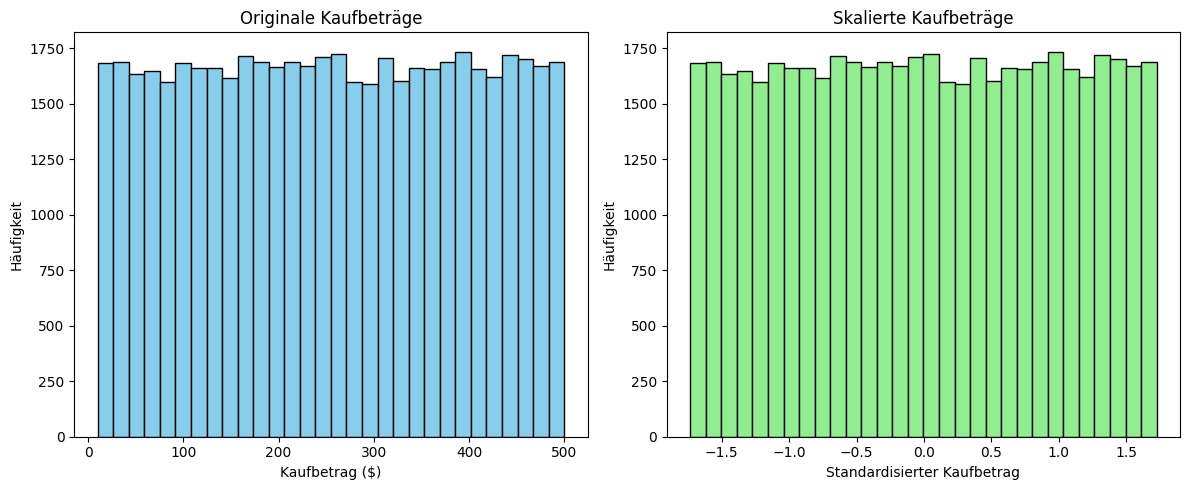

In [17]:
# Vergleich der Verteilung von originalen vs. skalierten Kaufbeträgen
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Originaldaten
ax1.hist(df['Purchase_Amount'], bins=30, color='skyblue', edgecolor='black')
ax1.set_title('Originale Kaufbeträge')
ax1.set_xlabel('Kaufbetrag ($)')
ax1.set_ylabel('Häufigkeit')

# Skalierte Daten
ax2.hist(df_scaled['Purchase_Amount'], bins=30, color='lightgreen', edgecolor='black')
ax2.set_title('Skalierte Kaufbeträge')
ax2.set_xlabel('Standardisierter Kaufbetrag')
ax2.set_ylabel('Häufigkeit')

plt.tight_layout()
plt.show()